In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


The aim of the project is to conduct an exploratory analysis of the spread of the COVID-19 pandemic in time and geographic terms from January to July 2020. The project aims to identify trends, comparisons between countries and regions, as well as calculate key metrics such as mortality, recovery rate.

Specific sub-goals:
Understand the dynamics of infections, deaths and recoveries over time.

Compare countries and continents by the scale and impact of the pandemic.

Calculate secondary metrics: mortality, recovery rate.

Present information using graphs for visual analysis.

Lat -> Latitude of location

Long -> Longitude of location

Date -> Cumulative report date

Confirmed -> Total number of confirmed cases to date

Death -> Total number of deaths to date

Recovered -> Total number of recovered cases to date

Active -> Active


In [188]:
covid = pd.read_csv("D:/ProjectsKaggle/COVID-19 Dataset/covid_19_clean_complete.csv")
covid.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


View columns and general statistics

In [189]:
covid.info()
covid.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [190]:
covid.shape

(49068, 10)

In [191]:
missing_values = covid.isnull().sum().sort_values(ascending=False)
missing_values


Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [192]:
covid.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

Checking for duplicates

In [193]:
covid.duplicated().sum()

np.int64(0)

In which countries/regions have confirmed cases of infection been recorded. Total number of infected. Top 10 countries by infected.

In [194]:
conf = covid.groupby("Country/Region")["Confirmed"].sum()
conf.head()

Country/Region
Afghanistan    1936390
Albania         196702
Algeria        1179755
Andorra          94404
Angola           22662
Name: Confirmed, dtype: int64

In [195]:
conf_all = covid["Confirmed"].sum()
conf_all

np.int64(828508482)

In [196]:
conf_top_10 = conf.sort_values(ascending=False)[:10]
conf_top_10_df = conf_top_10.reset_index()
conf_top_10


Country/Region
US                224345948
Brazil             89524967
Russia             45408411
India              40883464
Spain              27404045
United Kingdom     26748587
Italy              26745145
France             21210926
Germany            21059152
Iran               19339267
Name: Confirmed, dtype: int64

Number of infected in different countries

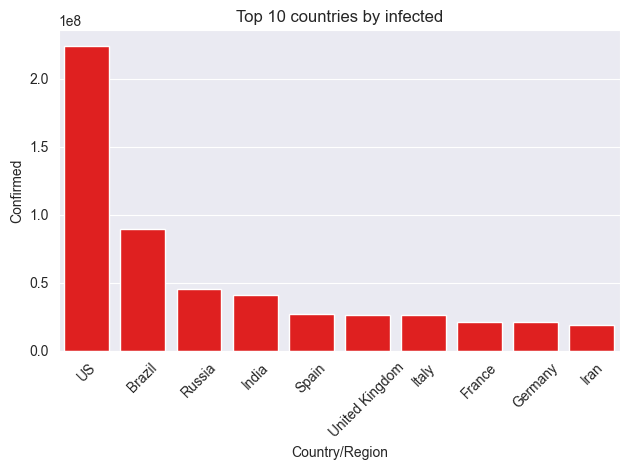

In [242]:
sns.barplot(data = conf_top_10_df, x = "Country/Region", y = "Confirmed", color="red")
plt.title("Top 10 countries by infected")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Number of infected by continent

In [198]:
conf_cont = covid.groupby("WHO Region")["Confirmed"].sum().sort_values(ascending=False)
conf_cont = conf_cont.reset_index()
conf_cont

,WHO Region,Confirmed
0,Americas,402261194
1,Europe,248879793
2,Eastern Mediterranean,74082892
3,South-East Asia,55118365
4,Western Pacific,26374411
5,Africa,21791827


Infection graph by continent

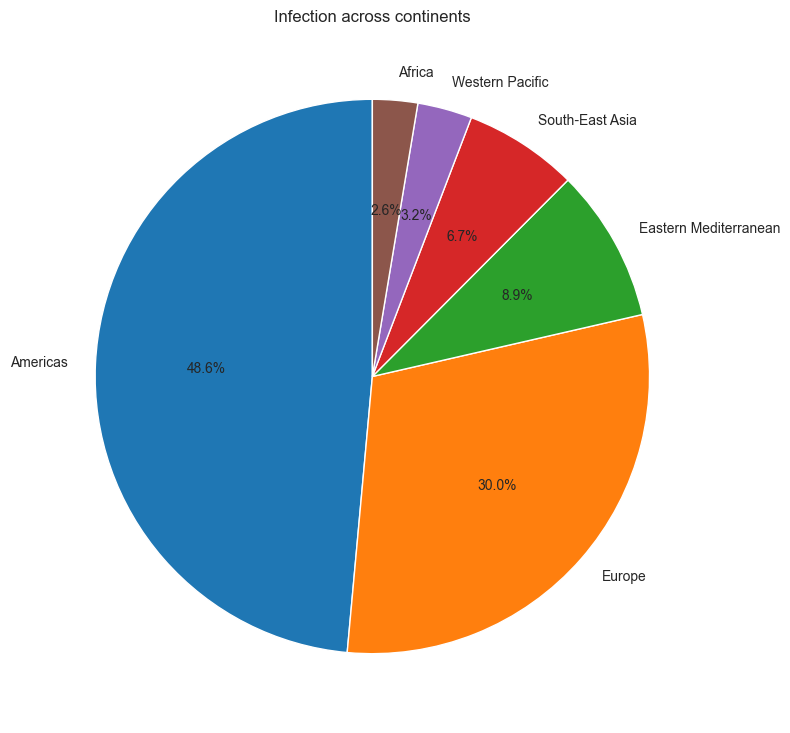

In [235]:
plt.figure(figsize=(9,9))
plt.pie(conf_cont["Confirmed"], labels=conf_cont["WHO Region"], autopct="%1.1f%%", startangle=90)
plt.title("Infection across continents")
plt.show()

As you can see from the graph, Europe and America are the clear leaders in terms of the number of infected.

Plotting a timeline chart for Europe and America

In [201]:
europe_covid = covid[covid["WHO Region"] == "Europe"].copy()
europe_covid

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,Europe
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,Europe
7,NaN,Armenia,40.0691,45.0382,2020-01-22,0,0,0,0,Europe
16,NaN,Austria,47.5162,14.5501,2020-01-22,0,0,0,0,Europe
17,NaN,Azerbaijan,40.1431,47.5769,2020-01-22,0,0,0,0,Europe
...,...,...,...,...,...,...,...,...,...,...
49053,British Virgin Islands,United Kingdom,18.4207,-64.6400,2020-07-27,8,1,7,0,Europe
49054,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,2020-07-27,99,2,36,61,Europe
49059,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,2020-07-27,13,0,13,0,Europe
49060,Saint Pierre and Miquelon,France,46.8852,-56.3159,2020-07-27,4,0,1,3,Europe


Top 10 infected countries in Europe

In [202]:
europe_conf = europe_covid.groupby("Country/Region")["Confirmed"].sum().sort_values(ascending=False)[:10]
europe_conf = europe_conf.reset_index()
europe_conf.head()

,Country/Region,Confirmed
0,Russia,45408411
1,Spain,27404045
2,United Kingdom,26748587
3,Italy,26745145
4,France,21210926


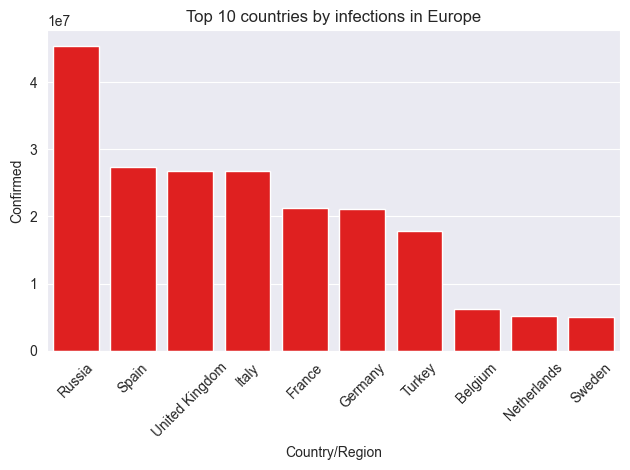

In [203]:
sns.barplot(data = europe_conf, x = "Country/Region", y = "Confirmed", color="red")
plt.title("Top 10 countries by infections in Europe")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 10 Countries by Mortality in Europe

In [204]:
europe_d = europe_covid.groupby("Country/Region")["Deaths"].sum().sort_values(ascending=False)[:10]
europe_d = europe_d.reset_index()
europe_d.head()

,Country/Region,Deaths
0,United Kingdom,3997775
1,Italy,3707717
2,France,3048524
3,Spain,3033030
4,Belgium,963679


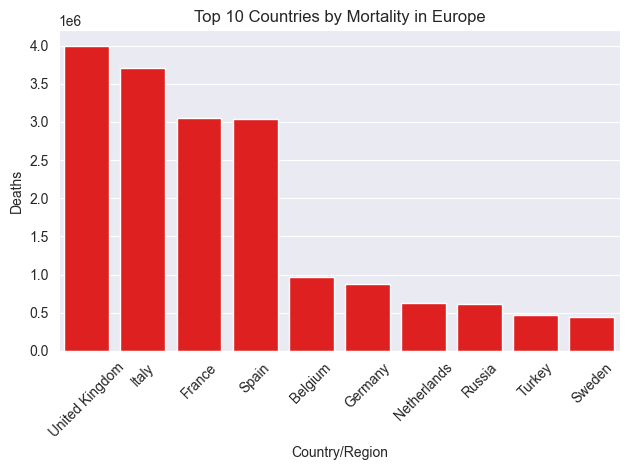

In [205]:
sns.barplot(data = europe_d, x = "Country/Region", y = "Deaths", color="red")
plt.title("Top 10 Countries by Mortality in Europe")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 10 countries by activity in Europe

In [206]:
europe_a = europe_covid.groupby("Country/Region")["Active"].sum().sort_values(ascending=False)[:10]
europe_a = europe_a.reset_index()
europe_a.head()

,Country/Region,Active
0,United Kingdom,22624595
1,Russia,19668578
2,France,10980287
3,Spain,9277432
4,Italy,7363518


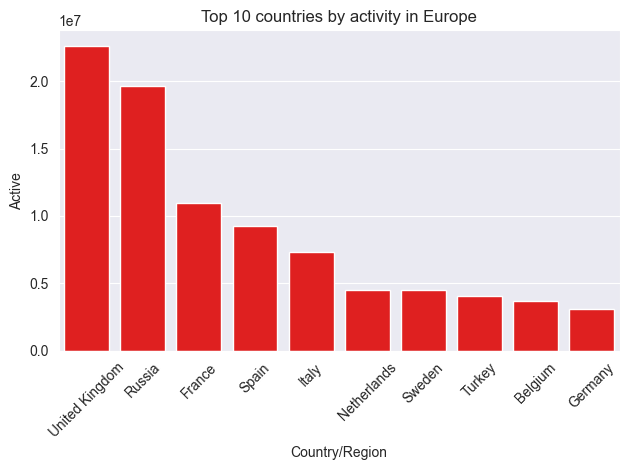

In [207]:
sns.barplot(data = europe_a, x = "Country/Region", y = "Active", color="red")
plt.title("Top 10 countries by activity in Europe")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Total number of infected in Europe

In [208]:
europe_all = europe_covid["Confirmed"].sum()
europe_all

np.int64(248879793)

For better visualization, we convert the daily date into a monthly date.

In [209]:
europe_covid["Date"] = pd.to_datetime(europe_covid["Date"])

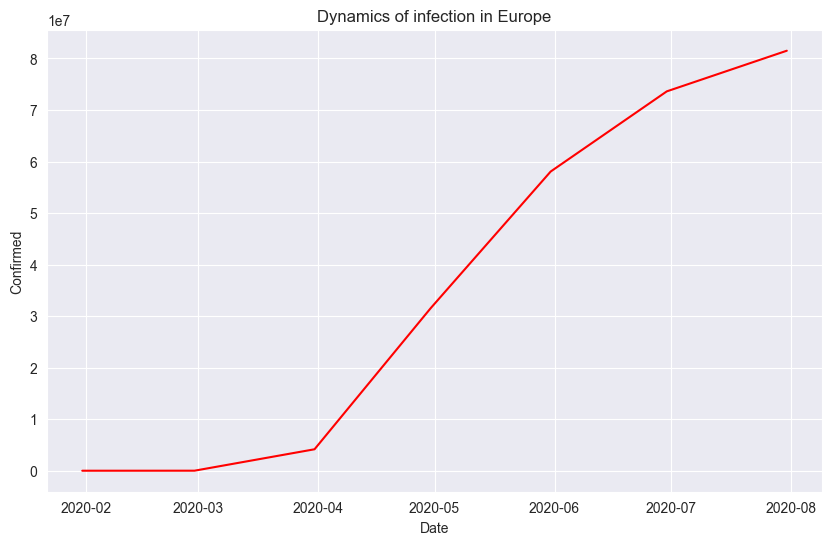

In [210]:
europe_daily_conf = europe_covid.groupby("Date")["Confirmed"].sum().reset_index()
europe_monthly_conf = europe_daily_conf.set_index("Date").resample("ME").sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data = europe_monthly_conf, x = "Date", y = "Confirmed", color="red")
plt.title("Dynamics of infection in Europe")
plt.show()

Dynamics of infection in Europe

Mortality dynamics in Europe

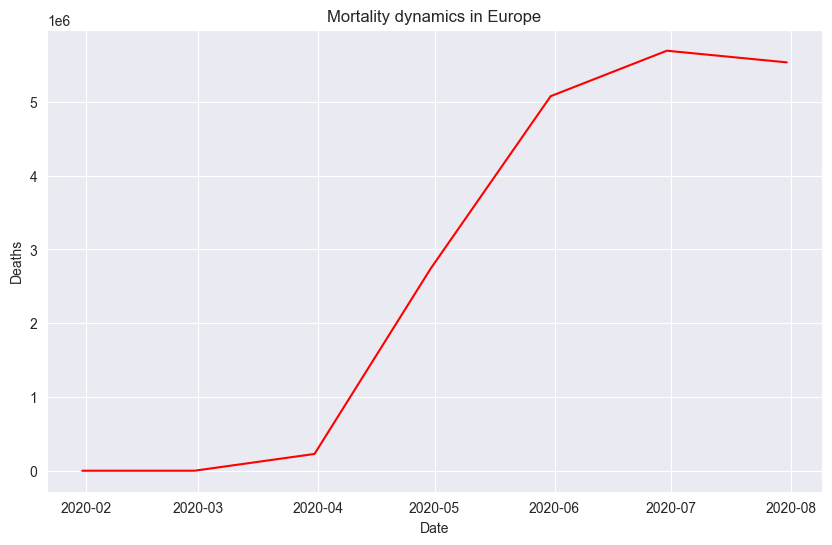

In [211]:
europe_daily_d = europe_covid.groupby("Date")["Deaths"].sum().reset_index()
europe_monthly_d = europe_daily_d.set_index("Date").resample("ME").sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data = europe_monthly_d, x = "Date", y = "Deaths", color="red")
plt.title("Mortality dynamics in Europe")
plt.show()

Mortality dynamics in Europe

Dynamics of activity in Europe

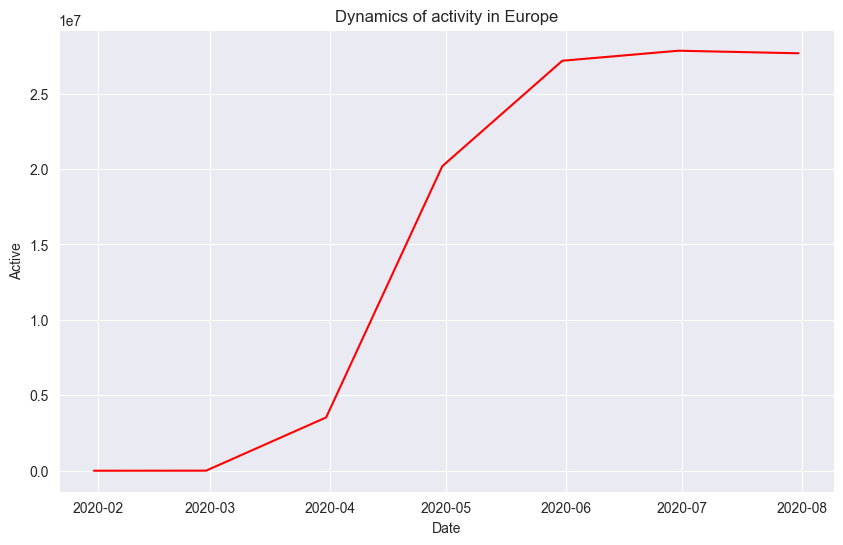

In [212]:
europe_daily_a = europe_covid.groupby("Date")["Active"].sum().reset_index()
europe_monthly_a = europe_daily_a.set_index("Date").resample("ME").sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data = europe_monthly_a, x = "Date", y = "Active", color="red")
plt.title("Dynamics of activity in Europe")
plt.show()

Dynamics of activity in Europe

The graphs show that the sharp rise occurs from 2020-04 to 2020-06. This means that the virus has not yet been detected or measures have not yet been taken to stop it. The graph of infected people shows that the infection is slowing down, which indicates that measures have been taken to combat the virus. The mortality graph has even begun to decline.

In [213]:
america_covid = covid[covid["WHO Region"] == "Americas"].copy()
america_covid

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
5,NaN,Antigua and Barbuda,17.060800,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.416100,-63.616700,2020-01-22,0,0,0,0,Americas
18,NaN,Bahamas,25.025885,-78.035889,2020-01-22,0,0,0,0,Americas
21,NaN,Barbados,13.193900,-59.543200,2020-01-22,0,0,0,0,Americas
26,NaN,Bolivia,-16.290200,-63.588700,2020-01-22,0,0,0,0,Americas
...,...,...,...,...,...,...,...,...,...,...
49037,NaN,Grenada,12.116500,-61.679000,2020-07-27,23,0,23,0,Americas
49041,NaN,Belize,17.189900,-88.497600,2020-07-27,48,2,26,20,Americas
49047,NaN,Saint Kitts and Nevis,17.357822,-62.782998,2020-07-27,17,0,15,2,Americas
49048,Northwest Territories,Canada,64.825500,-124.845700,2020-07-27,5,0,0,5,Americas


Top 10 countries by number of infected in America

In [214]:
america_conf = america_covid.groupby("Country/Region")["Confirmed"].sum().sort_values(ascending=False)[:10]
america_conf = america_conf.reset_index()
america_conf

,Country/Region,Confirmed
0,US,224345948
1,Brazil,89524967
2,Peru,19263916
3,Chile,16935654
4,Mexico,14946202
5,Canada,9356551
6,Colombia,6893122
7,Ecuador,4678496
8,Argentina,4450658
9,Dominican Republic,2495433


Top 10 Countries by Death Rate in America

In [215]:
america_d = america_covid.groupby("Country/Region")["Deaths"].sum().sort_values(ascending=False)[:10]
america_d = america_d.reset_index()
america_d

,Country/Region,Deaths
0,US,11011411
1,Brazil,3938034
2,Mexico,1728277
3,Canada,699566
4,Peru,652113
5,Ecuador,346618
6,Chile,322480
7,Colombia,236525
8,Argentina,97749
9,Bolivia,78032


Top 10 countries by infection activity in America

In [216]:
america_a = america_covid.groupby("Country/Region")["Active"].sum().sort_values(ascending=False)[:10]
america_a = america_a.reset_index()
america_a

,Country/Region,Active
0,US,156981121
1,Brazil,31094060
2,Canada,8656985
3,Peru,7748957
4,Colombia,3832786
5,Chile,3320581
6,Argentina,2672885
7,Ecuador,2559668
8,Mexico,2076700
9,Bolivia,1520666


Total number of infected in America

In [217]:
america_all = america_covid["Confirmed"].sum()
america_all

np.int64(402261194)

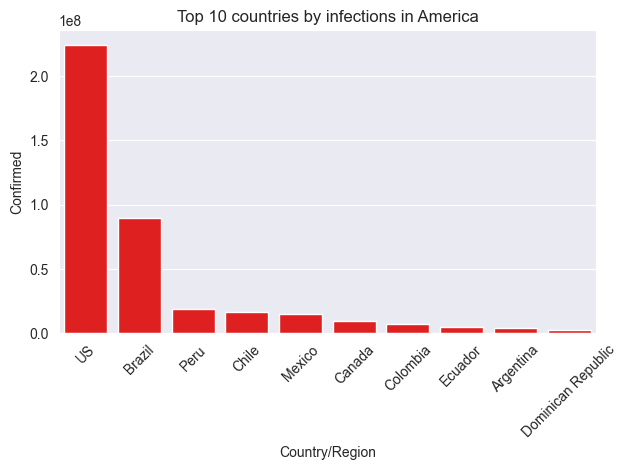

In [236]:
sns.barplot(data = america_conf, x = "Country/Region", y = "Confirmed", color="red")
plt.title("Top 10 countries by infections in America")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 10 countries by infections in America

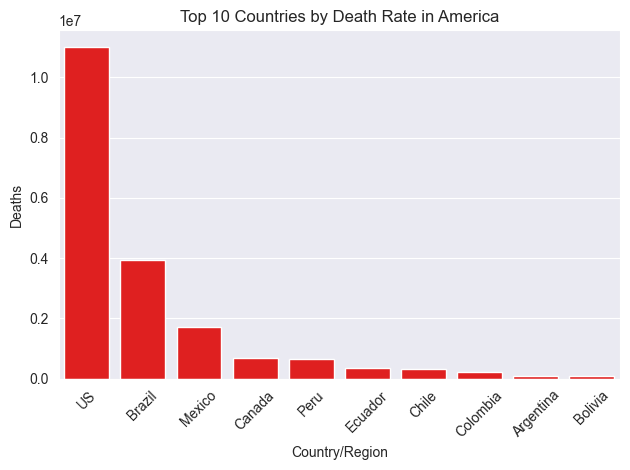

In [240]:
sns.barplot(data = america_d, x = "Country/Region", y = "Deaths", color="red")
plt.title("Top 10 Countries by Death Rate in America")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 10 Countries by Death Rate in America

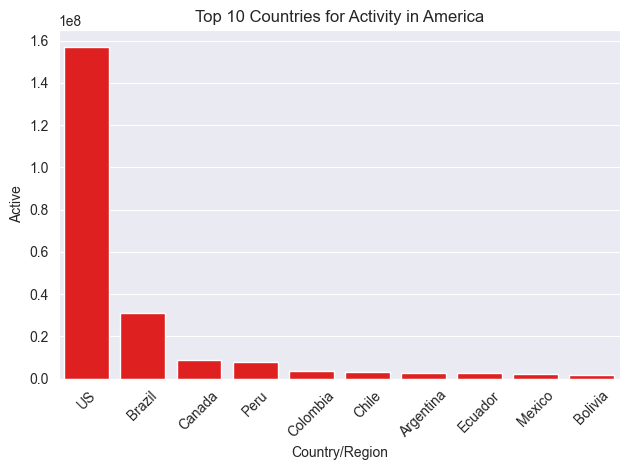

In [241]:
sns.barplot(data = america_a, x = "Country/Region", y = "Active", color="red")
plt.title("Top 10 Countries for Activity in America")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 10 Countries for Activity in America

Infection dynamics in America

In [221]:
america_covid["Date"] = pd.to_datetime(america_covid["Date"])

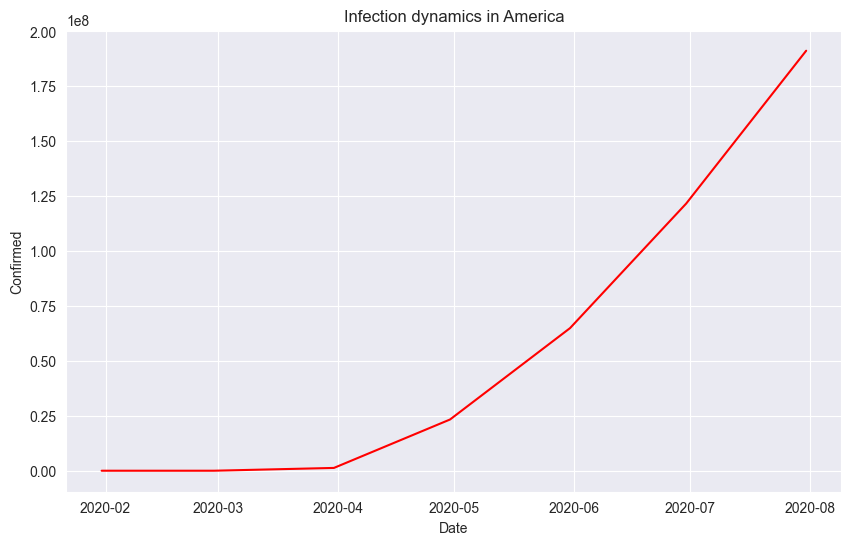

In [237]:
america_daily_conf = america_covid.groupby("Date")["Confirmed"].sum().reset_index()
america_monthly_conf = america_daily_conf.set_index("Date").resample("ME").sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data = america_monthly_conf, x = "Date", y = "Confirmed", color="red")
plt.title("Infection dynamics in America")
plt.show()

Infection dynamics in America

Dynamics of deaths in America

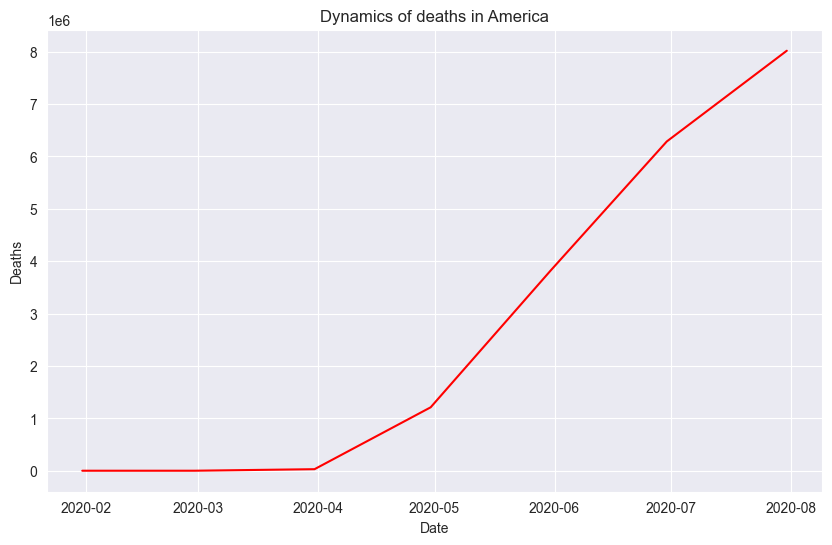

In [238]:
america_daily_d = america_covid.groupby("Date")["Deaths"].sum().reset_index()
america_monthly_d = america_daily_d.set_index("Date").resample("ME").sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data = america_monthly_d, x = "Date", y = "Deaths", color="red")
plt.title("Dynamics of deaths in America")
plt.show()

Dynamics of deaths in America

Dynamics of activity in America

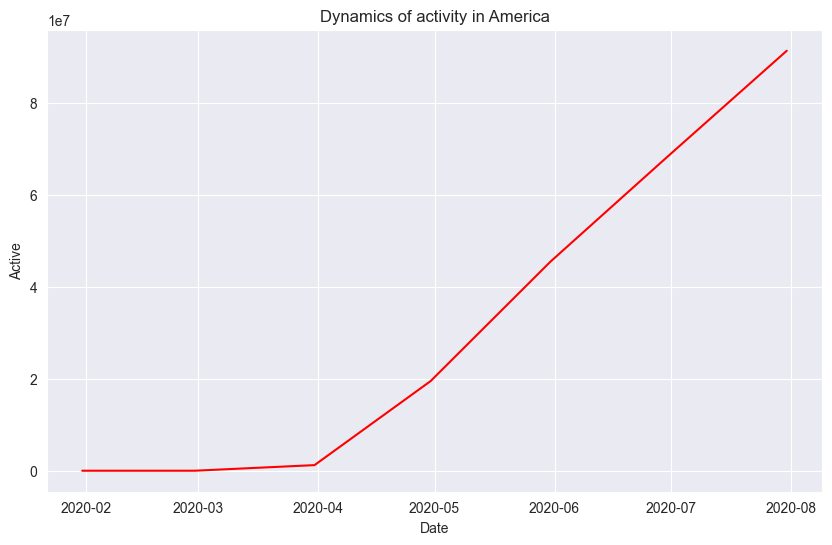

In [239]:
america_daily_a = america_covid.groupby("Date")["Active"].sum().reset_index()
america_monthly_a = america_daily_a.set_index("Date").resample("ME").sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data = america_monthly_a, x = "Date", y = "Active", color="red")
plt.title("Dynamics of activity in America")
plt.show()

Dynamics of activity in America

As in Europe, the sharp rise began in 2020-04, but continued to rise continuously in the following months for both the infection and mortality graphs.

Let's add new metrics for further analysis

In [225]:
sm_all = covid.groupby("Country/Region")[["Confirmed", "Deaths", "Recovered", "Active"]].sum().copy()

Mortality

In [226]:
sm_all["Fatality Rate"] = sm_all["Deaths"] / sm_all["Confirmed"]
sm_all["Fatality Rate"]

Country/Region
Afghanistan           0.025355
Albania               0.029019
Algeria               0.066092
Andorra               0.057445
Angola                0.047569
                        ...   
West Bank and Gaza    0.005868
Western Sahara        0.069922
Yemen                 0.263575
Zambia                0.020422
Zimbabwe              0.017345
Name: Fatality Rate, Length: 187, dtype: float64

Mortality for Europe

In [227]:
europe_sm = europe_covid[["Confirmed", "Deaths", "Recovered", "Active"]].sum().copy()
fatal_europe = europe_sm["Deaths"] / europe_sm["Confirmed"]
fatal_europe

np.float64(0.07743111551045045)

Mortality for America

In [228]:
america_sm = america_covid[["Confirmed", "Deaths", "Recovered", "Active"]].sum().copy()
fatal_america = america_sm["Deaths"] / america_sm["Confirmed"]
fatal_america

np.float64(0.04812617346330454)

Top 10 Countries by Mortality

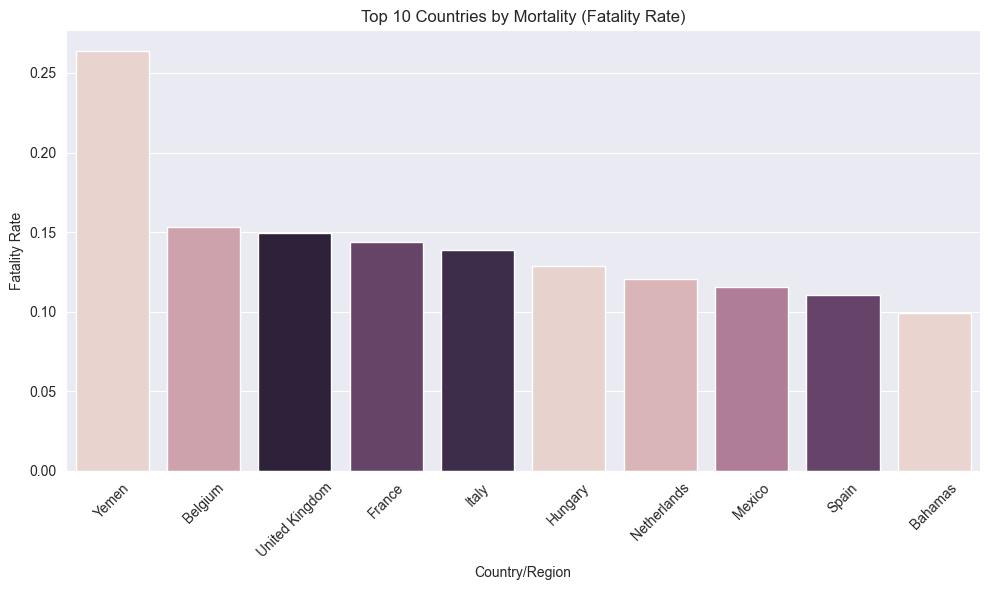

In [229]:
top_fatal = sm_all.sort_values("Fatality Rate", ascending=False).head(10).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=top_fatal, x="Country/Region", y="Fatality Rate", hue = "Deaths" , legend=False)
plt.title("Top 10 Countries by Mortality (Fatality Rate)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 10 Countries by Mortality (Fatality Rate)

Percentage of recovered

In [230]:
sm_all["Recovery Rate"] = sm_all["Recovered"] / sm_all["Confirmed"]
sm_all["Recovery Rate"]

Country/Region
Afghanistan           0.412231
Albania               0.604351
Algeria               0.640724
Andorra               0.731685
Angola                0.290045
                        ...   
West Bank and Gaza    0.261817
Western Sahara        0.719201
Yemen                 0.353960
Zambia                0.646039
Zimbabwe              0.240324
Name: Recovery Rate, Length: 187, dtype: float64

Share of recovered cases in Europe

In [231]:
europe_r = europe_covid[["Confirmed", "Deaths", "Recovered", "Active"]].sum().copy()
rec_europe = europe_r["Recovered"] / europe_r["Confirmed"]
rec_europe

np.float64(0.49502642828057963)

The share of recovered people in America

In [232]:
america_r = america_covid[["Confirmed", "Deaths", "Recovered", "Active"]].sum().copy()
rec_america = america_r["Recovered"] / america_r["Confirmed"]
rec_america

np.float64(0.390466309807652)

Top 10 Countries by Survivor Rate

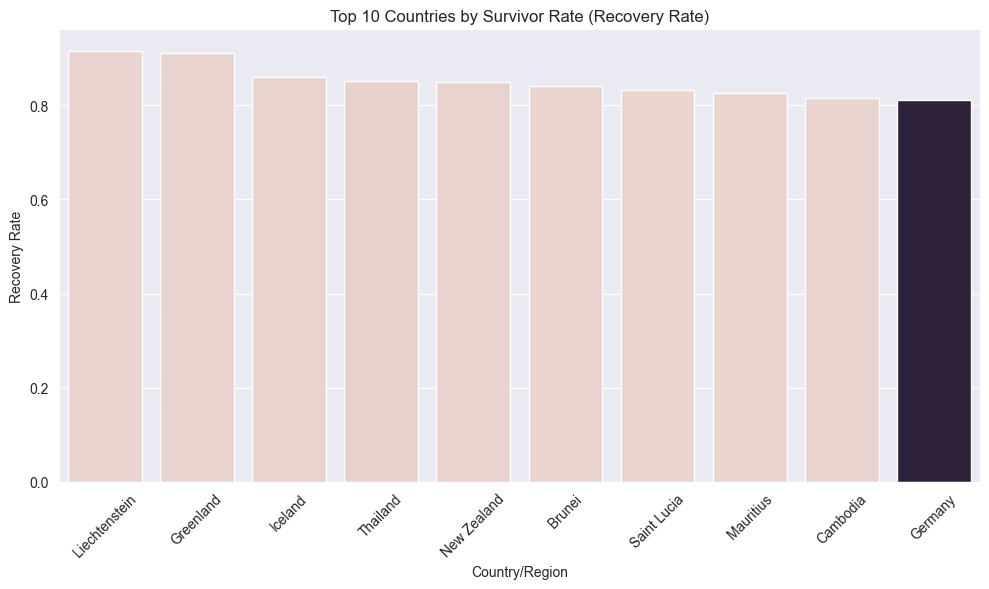

In [233]:
top_rec = sm_all.sort_values("Recovery Rate", ascending=False).head(10).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=top_rec, x="Country/Region", y="Recovery Rate", hue = "Recovered" , legend=False)
plt.title("Top 10 Countries by Survivor Rate (Recovery Rate)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 10 Countries by Survivor Rate

Conclusion: At the end of the project, it is clear that America was late in taking measures to prevent the spread of the virus. The US and Brazil have the highest mortality rate and the highest spread of infection. European countries dealt with the infection faster and it began to decline.

The project was completed with partial use of open sources (Kaggle/ChatGPT/StackOverflow) and my own analysis.